![matplotlib](http://matplotlib.org/_static/logo2.svg)
# <span style="color:green">Week 10 - Advanced Visualization</span>

## Today's Agenda
Today we will be focusing on plotting and on how to produce __`publication-ready`__ plots
- Modifying your `matplotlibrc` file
- Matplotlib Style sheets
- Seaborn
- Bokeh

# <span style="color:blue">Modifying your</span> <span style="color:red">matplotlibrc</span> <span style="color:blue">file</span>
Matplotlib uses a _special_ file called `matplotlibrc` file.
This file is usually in your __~/.matplotlib/matplotlibrc__

You can check the location of this file by typing:

In [2]:
%matplotlib inline
import matplotlib
matplotlib.matplotlib_fname()

u'/Users/victor2/.matplotlib/matplotlibrc'

In [3]:
import numpy as np
import matplotlib.pyplot as plt

You can also __edit__ the different parameters of the `matplotlibrc` file.

In [14]:
# List of possible values to be changed
import matplotlib as mpl
matplotlib.rcParams
print('Linewidth: {0}   Color: {1}'.format(
                                    mpl.rcParams['lines.linewidth'],
                                    mpl.rcParams['lines.color']))

Linewidth: 2.0   Color: r


In [15]:
# Changing line properties
mpl.rc('lines', linewidth=10, color='g')
print('Linewidth: {0}   Color: {1}'.format(
                                    mpl.rcParams['lines.linewidth'],
                                    mpl.rcParams['lines.color']))

Linewidth: 10.0   Color: g


# <span style="color:blue">Matplotlib Style sheets</span>

Newer versions of matplotlib offer the option to setup a __style sheet__.
For example, one can have a plot look like taken from `ggplot` or `SuperMongo`.

In [53]:
def plotting(stylename='classic'):
    # Defining data
    x = np.arange(0,10)
    y = np.random.randint(20,30,x.size)
    # Defining style sheet
    try:
        plt.style.use(stylename)
    except IOError,e:
        msg = '{0} not found'.format(stylename)
        raise IOError(msg)
    # Plotting
    plt.clf()
    plt.plot(x,y,'-ro', label=stylename)
    plt.xlabel('X label')
    plt.ylabel('X label')
    plt.legend(loc=1)
    plt.title('Plot using "{0}" Style'.format(stylename), fontsize=20 )
    plt.show()

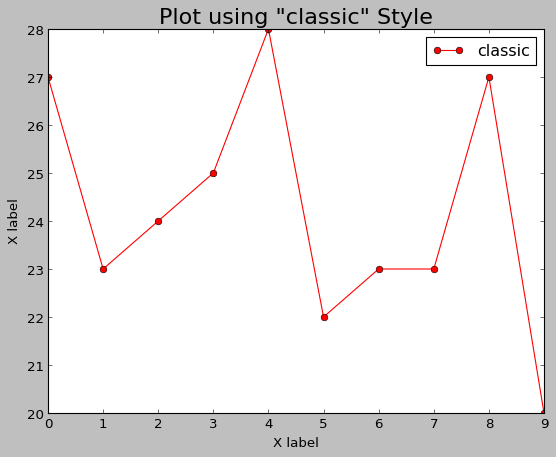

In [54]:
plotting(stylename='classic')

Now with a new __style sheet__

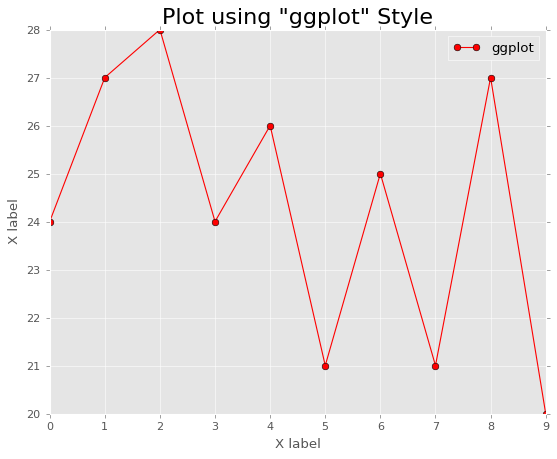

In [55]:
plotting(stylename='ggplot')

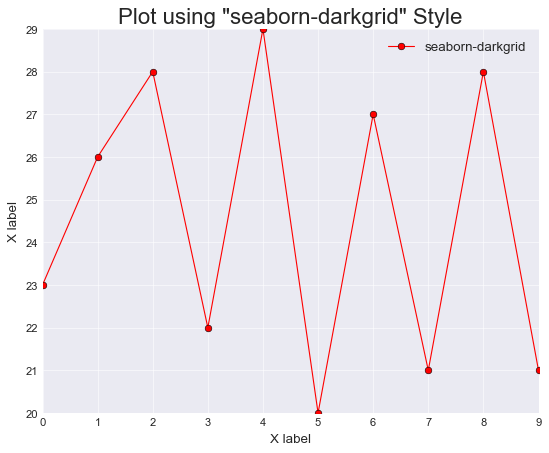

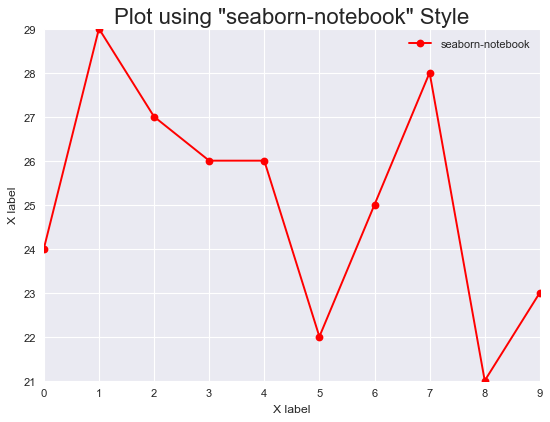

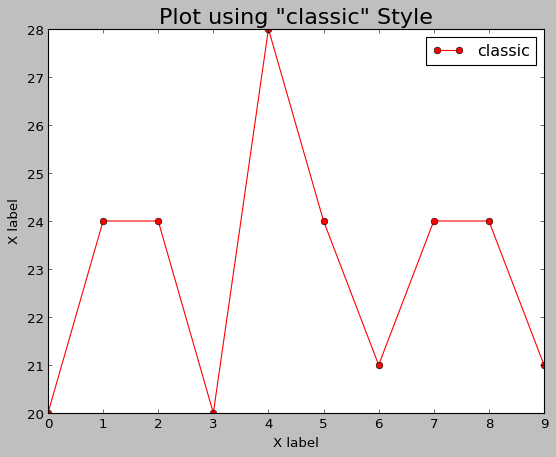

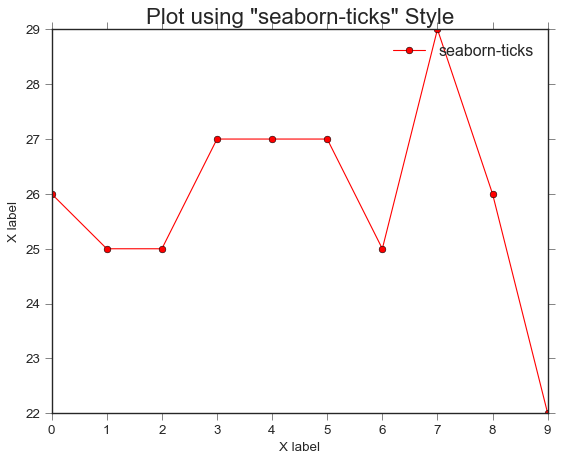

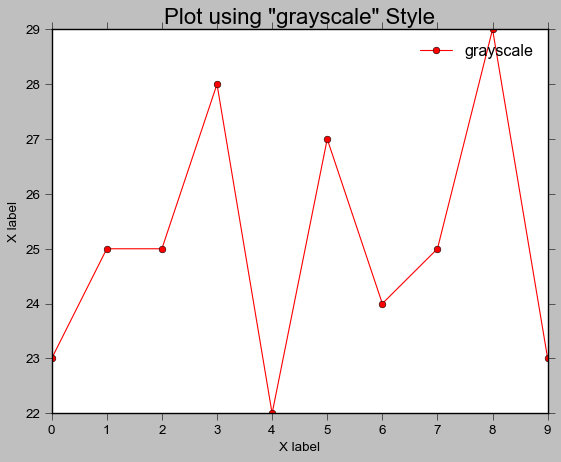

In [56]:
for style in plt.style.available[0:5]:
    plotting(stylename=style)

To get a list of the all the __styles available__:

In [57]:
plt.style.available

[u'seaborn-darkgrid',
 u'seaborn-notebook',
 u'classic',
 u'seaborn-ticks',
 u'grayscale',
 u'bmh',
 u'seaborn-talk',
 u'dark_background',
 u'ggplot',
 u'fivethirtyeight',
 u'seaborn-colorblind',
 u'seaborn-deep',
 u'seaborn-whitegrid',
 u'seaborn-bright',
 u'seaborn-poster',
 u'seaborn-muted',
 u'seaborn-paper',
 u'seaborn-white',
 u'seaborn-pastel',
 u'seaborn-dark',
 u'seaborn',
 u'seaborn-dark-palette']

- A nice website to look at the different style sheet is: [https://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html](https://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html)
- For more information on `style sheets`, see: [http://www.delaytolerantnetworks.com/Customizing-plots-with-style-sheets-in-matplotlib/](http://www.delaytolerantnetworks.com/Customizing-plots-with-style-sheets-in-matplotlib/)

# <span style="color:red">Seaborn</span>
- Website: [https://seaborn.pydata.org/](https://seaborn.pydata.org/)

Seaborn is visualization library based on matplotlib. It provides high-level interface for drawing attractive statistical graphics.

Some of the data here was taken from: [http://blog.insightdatalabs.com/advanced-functionality-in-seaborn/](http://blog.insightdatalabs.com/advanced-functionality-in-seaborn/)

## The Data

We'll be using the [ UCI "Auto MPG"](https://archive.ics.uci.edu/ml/datasets/Auto+MPG) data for the purpose of this module.

We'll be using pandas along with `Seaborn`.

In [60]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

Reading in the data that we'll be using:

In [63]:
names = [
       'mpg'
    ,  'cylinders'
    ,  'displacement'
    ,  'horsepower'
    ,  'weight'
    ,  'acceleration'
    ,  'model_year'
    ,  'origin'
    ,  'car_name'
]
df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data", sep='\s+', names=names)
df['maker'] = df.car_name.map(lambda x: x.split()[0])
df.origin = df.origin.map({1: 'America', 2: 'Europe', 3: 'Asia'})
df=df.applymap(lambda x: np.nan if x == '?' else x).dropna()
df['horsepower'] = df.horsepower.astype(float)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,maker
0,18.0,8,307.0,130.0,3504.0,12.0,70,America,chevrolet chevelle malibu,chevrolet
1,15.0,8,350.0,165.0,3693.0,11.5,70,America,buick skylark 320,buick
2,18.0,8,318.0,150.0,3436.0,11.0,70,America,plymouth satellite,plymouth
3,16.0,8,304.0,150.0,3433.0,12.0,70,America,amc rebel sst,amc
4,17.0,8,302.0,140.0,3449.0,10.5,70,America,ford torino,ford


### Factorplot and FacetGrid
- Look into [http://blog.insightdatalabs.com/advanced-functionality-in-seaborn/](http://blog.insightdatalabs.com/advanced-functionality-in-seaborn/)
- [http://seaborn.pydata.org/generated/seaborn.FacetGrid.html](http://seaborn.pydata.org/generated/seaborn.FacetGrid.html)
- [https://seaborn.pydata.org/tutorial.html](https://seaborn.pydata.org/tutorial.html)